<h1> BONUS EXERCISE 3 - Features</h1>


_Machine Learning (2021), Vahid Piroozbakht_


<h3> Dataset Name : “Pima Indians Diabetes Database”.</h3>

Source : Kaggle (https://www.kaggle.com/uciml/pima-indians-diabetes-database)

<h2> 1. Introduction:</h2>

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage. <a href="https://www.kaggle.com/uciml/pima-indians-diabetes-database">[1]</a>

In [1]:
# import libraries
import numpy as np
import matplotlib
import pandas as pd
import sklearn
import matplotlib.pyplot as plt 
from sklearn import model_selection
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

<h2>2. Problem Formulation: </h2>
The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

In [2]:
# Load Dataset
df=pd.read_csv('Diabetess.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72,35,NaN,33.6,0.627,50.0,1
1,1,85.0,66,29,NaN,26.6,0.351,31.0,0
2,8,183.0,64,0,NaN,23.3,0.672,32.0,1
3,1,89.0,66,23,94.0,28.1,0.167,21.0,0
4,0,137.0,40,35,168.0,43.1,2.288,33.0,1


<h3>2.1. Features:</h3>

In [4]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

The following features are present in the dataset:
* **Pregnancies:**  Number of times pregnant
* **Glucose:** Plasma glucose concentration over 2 hours in an oral glucose tolerance test
* **BloodPressure:** Diastolic blood pressure (mm Hg)
* **SkinThickness:** Triceps skin fold thickness (mm)
* **Insulin:** 2-Hour serum insulin (mu U/ml)
* **BMI:** Body mass index (weight in kg/(height in m)2)
* **DiabetesPedigreeFunction:** Diabetes pedigree function (a function which scores likelihood of diabetes based on family history)
* **Age:** Age (years)
* **Outcome:** Class variable (0 if non-diabetic, 1 if diabetic)


<h3>2.2. Pre processing features:</h3>
<h4>2.2.1 NaN value:</h4>
In below first we find the columns contain NaN value,

In [5]:
# Find colums contain NaN value
nanCols=[]
for col in df.columns:
    if df[df[col].isna()].shape[0]>0 :
        nanCols.append(col)
print("Colums contain NaN value: ",nanCols)

Colums contain NaN value:  ['Glucose', 'Insulin', 'BMI']


In [6]:
# set Nan values to zero
for nCol in nanCols:
    df[nCol]=df[nCol].fillna(0)
    print("Column '",nCol,"' NaN values are set to zero.")

Column ' Glucose ' NaN values are set to zero.
Column ' Insulin ' NaN values are set to zero.
Column ' BMI ' NaN values are set to zero.


<h3>2.3. Set the Training and validation set:</h3>
In this level after preparing data for processing, we need to divide our data set to two differnt sub sets. First is the Training set that will be used in mode training, seconnd validation set that is for testing and validating the model.

In [7]:
# set X and y
y=df.Outcome
tmpDS=df.drop(columns=['Outcome'])
X=tmpDS
print('Shape of X is', X.shape)
print('Shape of y is', y.shape)

Shape of X is (768, 8)
Shape of y is (768,)


<h2>3. Feature selection:</h2>
In this part we try to first select 3 features <i>Glucose, BMI, and Age</i>, and apply the algorothm, then try some feature selection methods and compare the accuracy to see what is different.

<h3>3.1. Select the best features :</h3>
ExtraTreesClassifier: The sklearn.ensemble module includes two averaging algorithms based on randomized decision trees: the RandomForest algorithm and the Extra-Trees method. Both algorithms are perturb-and-combine techniques. specifically designed for trees. This means a diverse set of classifiers is created by introducing randomness in the classifier construction. The prediction of the ensemble is given as the averaged prediction of the individual classifiers.  <a href="https://scikit-learn.org/stable/modules/ensemble.html">[2]</a>


In [8]:
model = ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier()

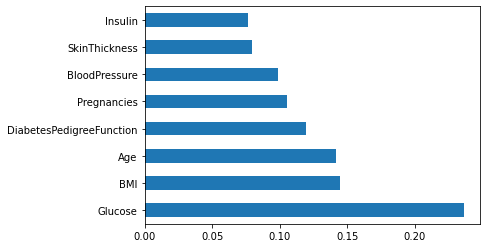

In [9]:
# Plot graph of feature importances for better visualisation
feature_importanes=pd.Series(model.feature_importances_,index=X.columns)
feature_importanes.nlargest(8).plot(kind='barh')
plt.show()

Here we can see the order of importance for features, which the highest is <b>Glucose</b> and lowest is <b>Insulin</b>.<br/>
We will use the 3 top best features in our prediction.

In [10]:
# Set Glucose, BMI, and Age, as the input variables and Outcome as the target variable
X_3f=df[["Glucose","BMI","Age"]]

# Split-out validation dataset
X_train,X_test,y_train,y_test=model_selection.train_test_split(
    X_3f,y,test_size=0.10,random_state=7)

In [11]:
# LogisticRegression
logB = LogisticRegression(max_iter=1000)
logB.fit(X_train, y_train)
pred= logB.predict(X_train)
tr_logB_error = mean_squared_error(y_train, pred)    # compute training error 
print("Training error: ",tr_logB_error)

pred = logB.predict(X_test)    # compute predictions of validation set
val_logB_error = mean_squared_error(y_test, pred)    # compute validation error 
print("Validation error: ",val_logB_error)
print("Score: ",logB.score(X_test,y_test))

Training error:  0.23154848046309695
Validation error:  0.19480519480519481
Score:  0.8051948051948052


<h2>4. Conclusion:</h2>
According to the data processes in part 3.1 and 3.2 which were on the Diabetes data set, and by comparing the results of our feature selection, we can see by using best and more important features we can get highest accuracy in our model.